# Анализ продаж и прогнозирование на предстоящий год интернет-магазина компьютерных игр

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Описание данных

В нашем распоряжении датасет: *games.csv*

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

##  План проекта

- Загрузка данных и изучение общей информации
- Предобработка данных
- Исследовательский анализ данных
- Составим портрет пользователя каждого региона

  Определим для пользователя каждого региона (NA, EU, JP):
      1) Самые популярные платформы (топ-5).
      2) Самые популярные жанры (топ-5).
      3) Влияет ли рейтинг ESRB на продажи в отдельном регионе.
- Проверка гипотез:
      1) Средние пользовательские рейтинги платформ XOne и PC одинаковые;
      2) Средние пользовательские рейтинги жанров Action и Sports разные.
- Общий вывод

## Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/888/OneDrive/Рабочий стол/Проект games/games.csv')

Выведем основную информацию о датафрейме:

In [4]:
# напишем функцию для обзора данных:
def print_primary_info(df):
    print("\nПервичная информация о датафрейме")
    print("Количество записей:", df.shape[0])
    print("Количество столбцов:", df.shape[1])
    print("\nПервые 10 строк:")
    display(df.head(10))
    print("Информация о типах данных: \n")
    print(df.info())
    print("\nПропуски:")
    display(df.isna().sum())
    print("Процент пропусков от всего датафрейма:")
    display(df.isna().mean().sort_values(ascending=False)*100)
    print("Дубликаты:")
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')  

In [5]:
print_primary_info(df)


Первичная информация о датафрейме
Количество записей: 16715
Количество столбцов: 11

Первые 10 строк:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Информация о типах данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Пропуски:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Процент пропусков от всего датафрейма:


Critic_Score      51.32
Rating            40.48
User_Score        40.09
Year_of_Release    1.61
Name               0.01
Genre              0.01
Platform           0.00
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
dtype: float64

Дубликаты:
Дубликатов НЕТ


### Промежуточный вывод

- В датафрейме 16715 записей в 11 столбцах.
- Необходимо привести названия столбцов к нижнему регистру.
- В столбцах *Year_of_Release* и *User_Score* неоходимо заменить тип данных.
- В столбцах *Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating* необходимо обработать пропуски.
- Явных дубликатов нет.

## Предобработка данных

### Название столбцов приведем к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типа данных, обработка пропусков

**В столбце *year_of_release* меняем тип данных.<br>
В этом столбце 269 пропусков, что состовляет 1.61% от общего числа записей. Удаляем эти пропуски.**

In [7]:
df = df.dropna(subset=['year_of_release'])    # удаляем пропуски 
df['year_of_release'] = df['year_of_release'].astype('int')    # меняем тип данных на цельночисленный
df['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

**Посмотрим на пропуски в столбцах *name, genre*:**

In [8]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски совпадают. Возможности их заполнить нет - удаляем.

In [9]:
df = df.dropna(subset=['name'])

In [10]:
# проверяем
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Посмотрим на значения столбца *critic_score*:**

In [11]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [12]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски заменить нечем - оставим без изменения.<br>
Также замечаем, что данные представленны целочисленными значениями. Поменяем тип.

In [13]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [14]:
# проверим
df['critic_score'].sort_values().unique()

<IntegerArray>
[  13,   17,   19,   20,   21,   23,   24,   25,   26,   27,   28,   29,   30,
   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
   96,   97,   98, <NA>]
Length: 82, dtype: Int64

**Посмотрим на значения столбца *user_score*:**

In [15]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Мы замечаем значение 'tbd' (англ. "To Be Determined", то есть "Будет определено"). Чтобы привести данный столбец к типу float, мы заменяем его пропусками.

In [16]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype('float')

In [17]:
# проверяем
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [18]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Пропуски в столбце *user_score* заменить нечем - оставим без изменения.

**Посмотрим на значения столбца *rating*:**

In [19]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Согласно ресурса: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board <br>
*Entertainment Software Rating Board (ESRB)* — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).<br>
Определение рейтингов началось с 1994 года, поэтому появление пропусков в наших данных — это вполне нормальное явление. Заменим их на значение *'unknown'*.<br>
Также, согласно этому ресурсу, значение рейтинга *'K-A'* эквивалентно значению *'E'* — произведем соответствующую замену.

In [20]:
df['rating'] = df['rating'].fillna('unknown')
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [21]:
# проверим
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'unknown'], dtype=object)

### Неявные дубликаты

Проверим на неявные дубликаты по трем столбцам *name, platform, year_of_release*:

In [22]:
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.50,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.50,E


Имеется одно совпадение с продажами в Европе. Вероятно это специальное издание - оставим без изменений.

### Столбец суммарные продажи во всех регионах

Добавим к таблице еще один столбец *total_sales* с суммарными продажами по всем регионам:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df = df.reindex(columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating'])
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,<NA>,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,8.30,E


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   total_sales      16444 non-null  float64
 9   critic_score     7983 non-null   Int64  
 10  user_score       7463 non-null   float64
 11  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


### Промежуточный вывод

В ходе предобработки данных:
- Привели название столбцов к "хорошему стилю" - нижнему регистру.
- В столбцах *year_of_release, critic_score, user_score* поменяли тип данных.
- Обработали пропуски.
- Проверили на неявные дубликаты.
- Добавили новый столбец *total_sales* с суммарными продажами по всем регионам.

Итоговый датафрейм содержит 16444 записи в 12 столбцах. Данные полные и достаточны для исследования. 

##  Исследовательский анализ данных (EDA)

В процессе анализа графиков обнаружилось, что на платформе DS существует одна игра, чья дата выпуска предшествует дате выхода самой платформы. Вполне вероятно, что это переиздание игры с более ранней платформы. Точную дату установить не удалось, поэтому было принято решение исключить эту игру из рассмотрения.

In [25]:
display(df.loc[(df['platform'] == "DS") & (df['year_of_release'] < 2004)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,0.02,<NA>,NaN,unknown


In [26]:
df = df.drop(index=[15957])
#проверяем
display(df.loc[(df['platform'] == "DS") & (df['year_of_release'] < 2004)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating


### Cколько игр выпускалось в разные годы

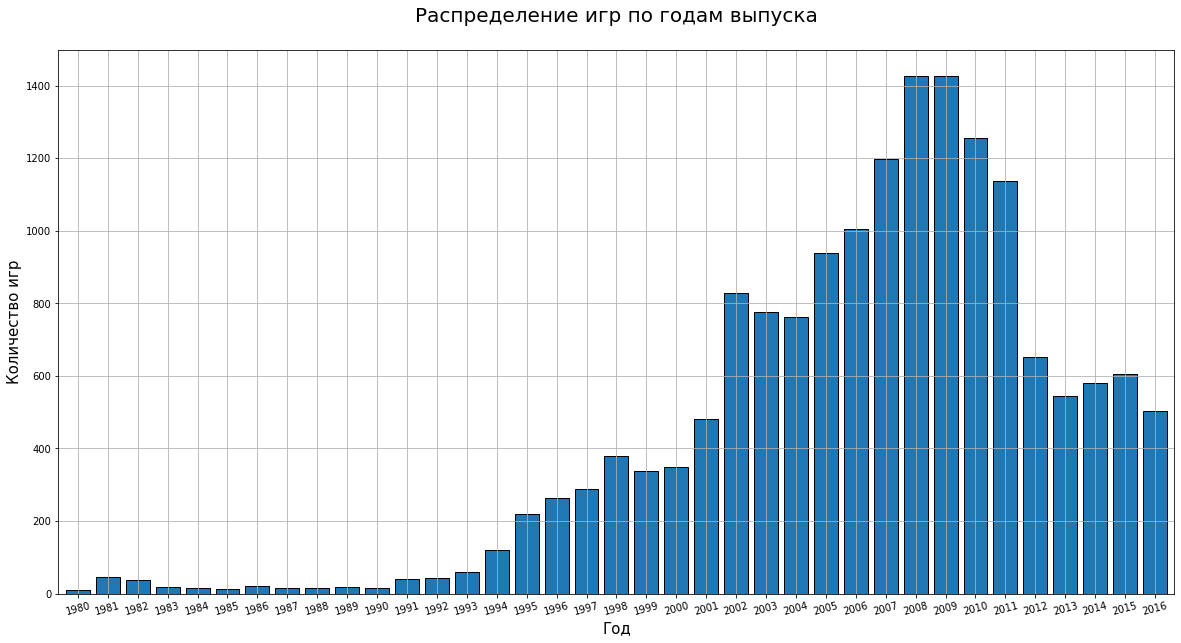

In [27]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
  .plot(kind='bar', grid=True, figsize=(20, 10), width=0.8, ec='black', legend = False)

plt.title('Распределение игр по годам выпуска'+ "\n", size=20)
plt.xlabel('Год', size=15)
plt.xticks(rotation=15)
plt.ylabel('Количество игр', size=15)
plt.show()

**Вывод:**
- В период с 1994 по 2009 год наблюдался значительный рост, за которым последовало снижение.
- До 1994 года количество выпускаемых игр было незначительным.
- Наибольшее число игр было выпущено в период с 2002 по 2011 год, что свидетельствует о расцвете индустрии в это время.
- С 2012 года выпуск игр сократился вдвое. Это связано с переходом на более качественные проекты, а также с ростом популярности сетевых и онлайн-игр.

### Как менялись продажи по платформам

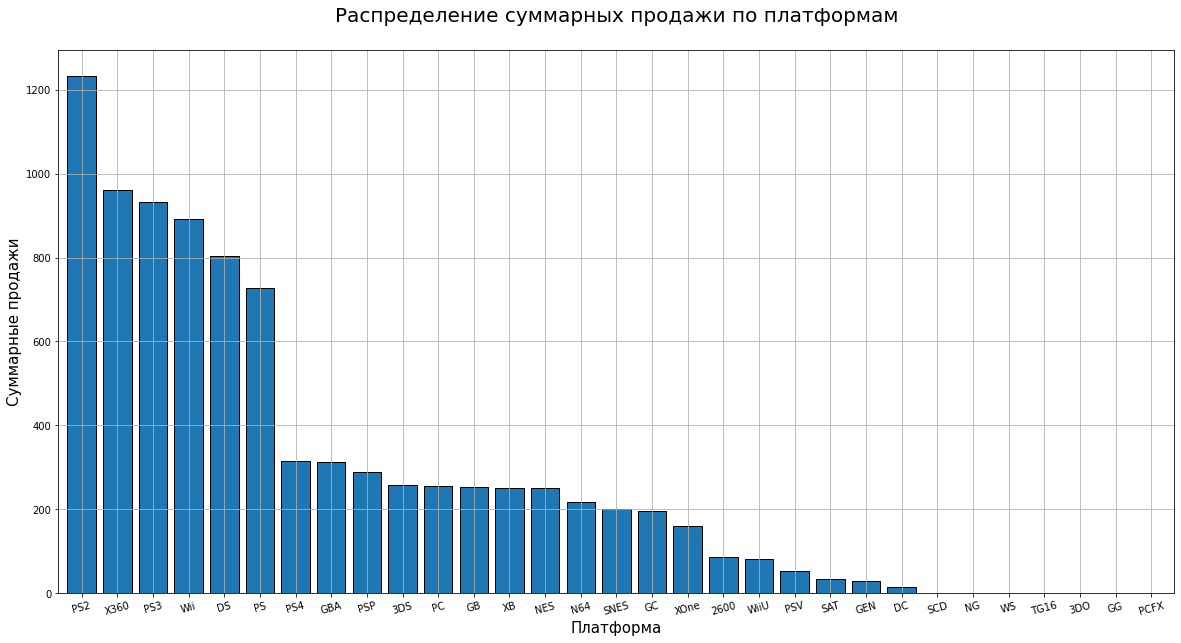

In [28]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', grid=True, figsize=(20, 10), width=0.8, ec='black', legend = False)

plt.title('Распределение суммарных продажи по платформам'+ "\n", size=20)
plt.xlabel('Платформа', size=15)
plt.xticks(rotation=15)
plt.ylabel('Суммарные продажи', size=15)
plt.show()

Со всего списка с большим отрывом лидируют 6 платформ: PS2, X360, PS3, Wii, DS, PS. <br>
Посмотрим на ТОП-10 из всех платформ.

In [29]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Создадим список ТОП-10 платформ:

In [30]:
max_sale = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
             .sort_values(by='total_sales', ascending=False)\
             .reset_index().head(10)['platform'].tolist()
max_sale

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Чтобы ответить на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?<br>
Построим графики:

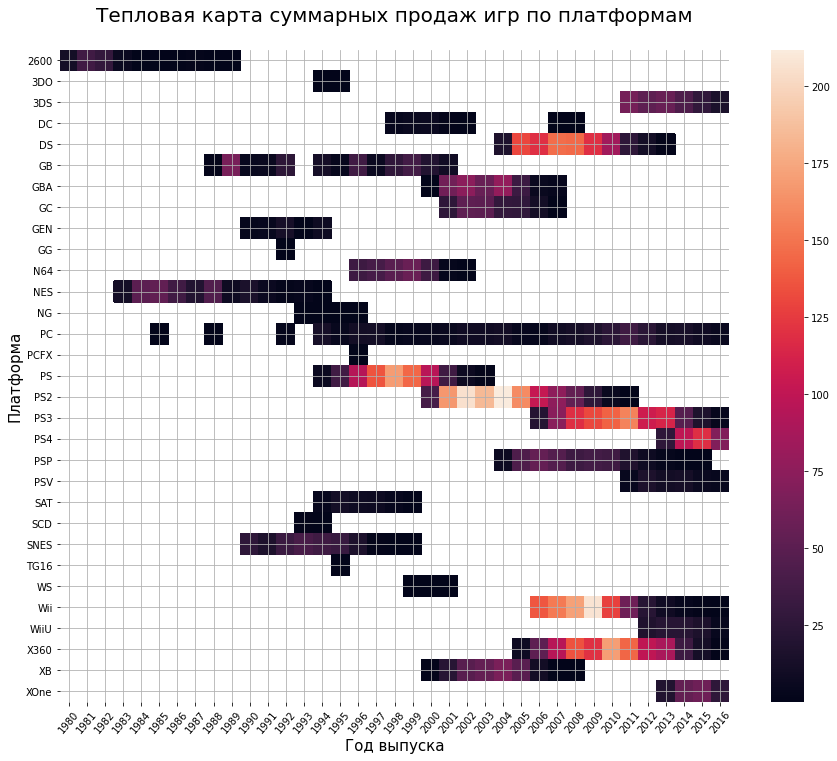

In [31]:
plt.figure(figsize = (15, 12))
sns.heatmap(df.sort_values(by='total_sales').pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'))
plt.title('Тепловая карта суммарных продаж игр по платформам'+ "\n", size=20)
plt.xlabel('Год выпуска', size=15)
plt.xticks(rotation=50)
plt.ylabel('Платформа', size=15)
plt.grid()
plt.show()

Здесь стоит отметить, что платформа PC не вошла в ТОП-10, несмотря на свои стабильные, хотя и не столь значительные по сравнению с лидерами, продажи на протяжении более 20 лет. Эта стабильность свидетельствует о неизменной популярности и устойчивом интересе к PC-играм, даже если их показатели продаж не достигают верхних строчек рейтингов.

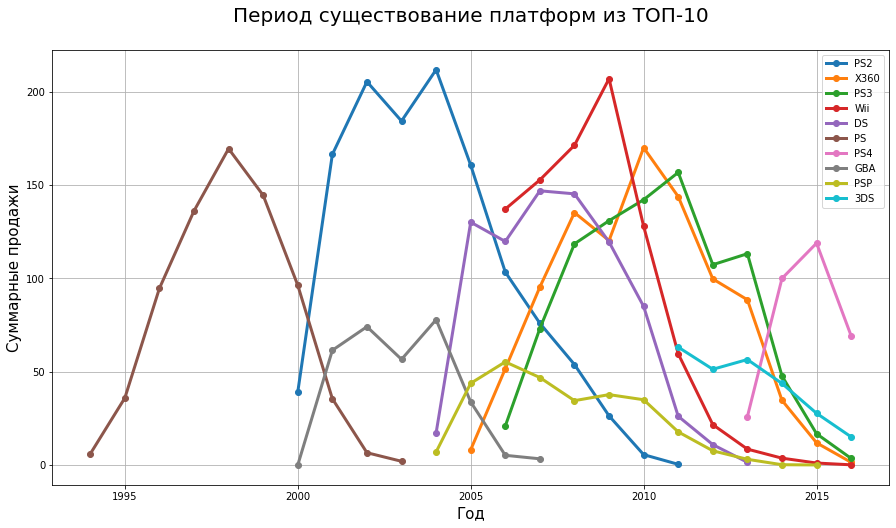

In [32]:
for b in max_sale:
    (
    df.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize=(15, 8), label=b, grid=True,style='o-', lw=3)
    )
    plt.title('Период существование платформ из ТОП-10'+ "\n", size=20)
    plt.xlabel('Год', size=15)
    plt.ylabel('Суммарные продажи', size=15)
    plt.legend()

График наглядно демонстрирует, что жизненный цикл платформ составляет примерно 8-12 лет, при этом пик их популярности длится не более 6 лет. <br>
Исходя из этого, для прогнозирования продаж на 2017 год целесообразно обратить внимание на период с 2012 по 2016 год. Вероятно, платформы, которые остаются актуальными и востребованными в этот промежуток времени, будут сохранять свою популярность ещё как минимум несколько лет.

### Данные за соответствующий актуальный период

Как отметили ранее актуальный период возьмём 2012-2016 год.<br>
Выведим данные за этот период в отдельный датафрейм *df_actual*.

In [33]:
df_actual = df.query('year_of_release >= 2012')

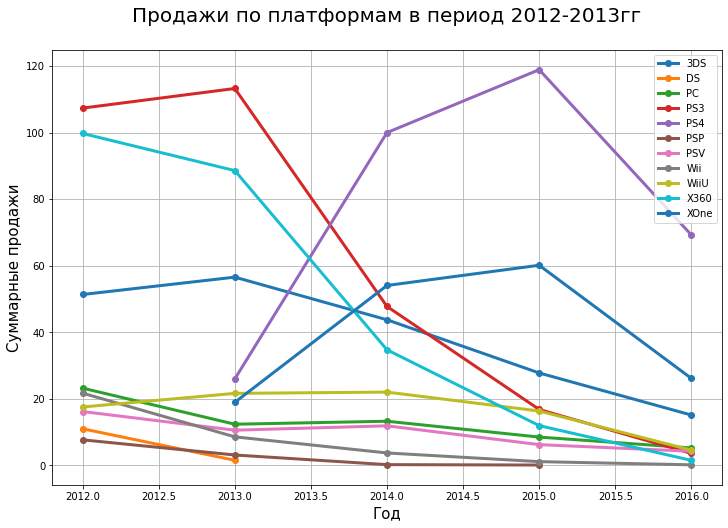

In [34]:
df_actual.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum').plot(figsize=(12, 8), grid=True, style='o-', lw=3)
plt.title('Продажи по платформам в период 2012-2013гг'+ "\n", size=20)
plt.xlabel('Год', size=15)
plt.ylabel('Суммарные продажи', size=15)
plt.legend();

График наглядно демонстрирует, что на всех платформах наблюдается снижение продаж игр. Однако стоит отметить, что данные за 2016 год являются неполными. Если принять этот факт во внимание, то у платформ PS4 и XOne есть потенциал для дальнейшего роста.

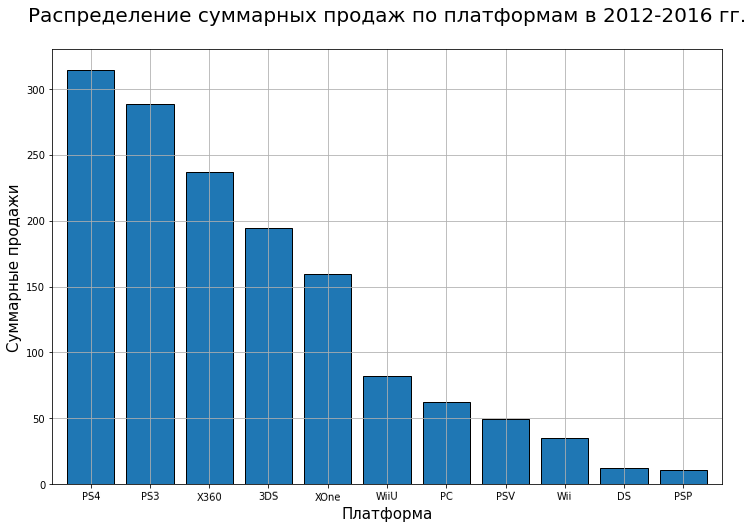

In [35]:
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)\
    .plot(kind='bar', grid=True, figsize=(12, 8), width=0.8, ec='black', legend = False)

plt.title('Распределение суммарных продаж по платформам в 2012-2016 гг.'+ "\n", size=20)
plt.xlabel('Платформа', size=15)
plt.xticks(rotation=1)
plt.ylabel('Суммарные продажи', size=15)
plt.show()

In [36]:
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
         .sort_values(by='total_sales', ascending=False)\
         .reset_index()['platform'].tolist()

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

ТОП-5 игровых платформ в 2012-2016 годах:

In [37]:
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
         .sort_values(by='total_sales', ascending=False)\
         .reset_index().head(5)['platform'].tolist()

['PS4', 'PS3', 'X360', '3DS', 'XOne']

**Вывод:**
- По платформам PS4 и XOne есть потенциал для дальнейшего роста.
- Актуальные платформы в 2012-2016 годах: PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP.
- ТОП-5: PS4, PS3, X360, 3DS, XOne.

### График «ящик с усами» по глобальным продажам игр

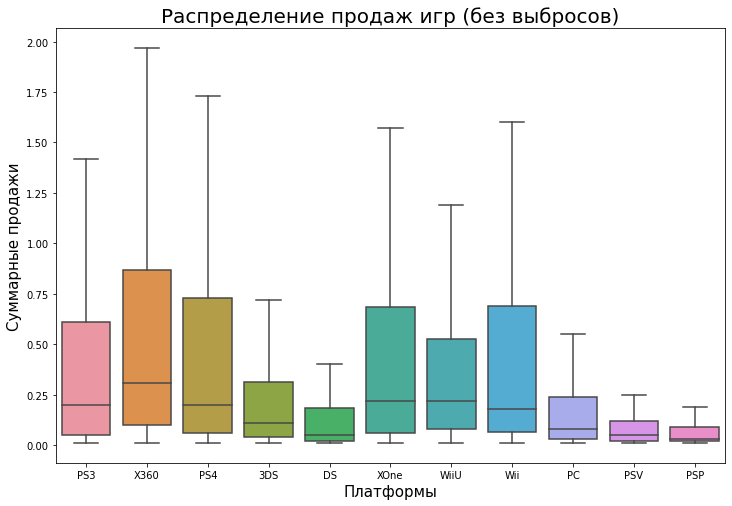

In [38]:
plt.figure(figsize=(12,8))

ax = sns.boxplot(x='platform', y='total_sales', data=df_actual, showfliers=False)
ax.set_ylabel('Суммарные продажи', size=15)
ax.set_xlabel('Платформы', size=15)
ax.set_title('Распределение продаж игр (без выбросов)', size=20)
plt.show()

**Вывод:**<br>
График «ящик с усами», отражающий глобальные продажи игр без учёта выбросов за период с 2012 по 2016 годы, демонстрирует интересную картину. На всех платформах существует множество игр с относительно невысокими продажами. Однако, среди них также выделяются настоящие бестселлеры, которые значительно повлияли на общие показатели. <br>
Особое внимание заслуживают платформы PS4, PS3, X360, XOne и Wii. Они показали хорошие результаты благодаря высоким медианным значениям и третьему квартилю, что свидетельствует о большом количестве успешных релизов и значительных продажах.

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Рассмотрим на примере самой популярной в актуальный период 2012-2016гг. платформы PS4.

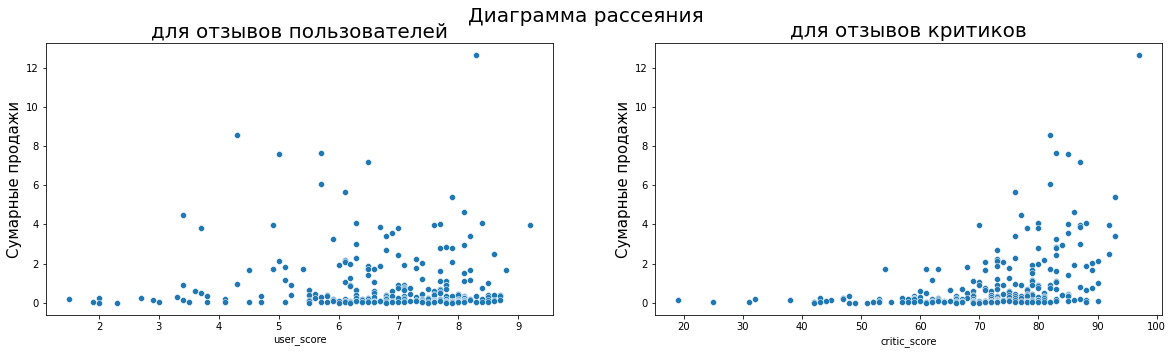

In [39]:
plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния'+"\n", size=20)

plt.subplot(1, 2, 1)
plt.title('для отзывов пользователей', size=20)
sns.scatterplot(x='user_score', y='total_sales', data=df_actual.query('platform == "PS4"'))
plt.ylabel('Сумарные продажи', size=15)

plt.subplot(1, 2, 2)
plt.title('для отзывов критиков', fontsize=20)
sns.scatterplot(x='critic_score', y='total_sales', data=df_actual.query('platform == "PS4"'))
plt.ylabel('Сумарные продажи', size=15)
plt.show();

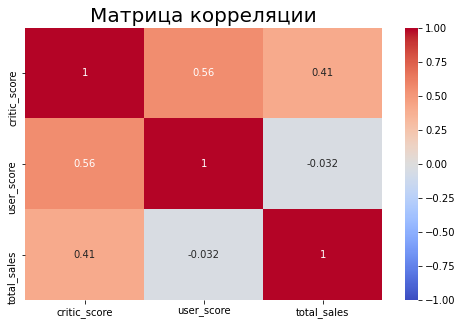

In [40]:
# Матрица корреляции
corr_matrix = df_actual.query('platform == "PS4"')[['critic_score', 'user_score', 'total_sales']].corr()
# Визуализация матрицы корреляции
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции', size=20)
plt.show()

**Вывод:**
- Отзывы пользователей не оказывают влияния на продажи игр на платформе PS4.
- Отзывы критиков имеют незначительное влияние на продажи.

### Влияние на продажи игр популярных платформ отзывов пользователей и критиков

Рассмотрим другие популярные платформы в актуальный период 2012-2016гг.: PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP.

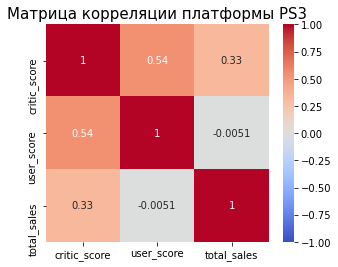

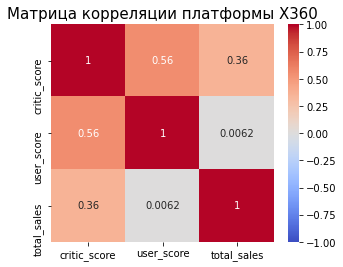

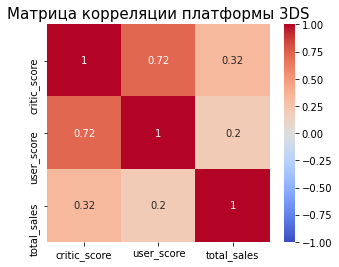

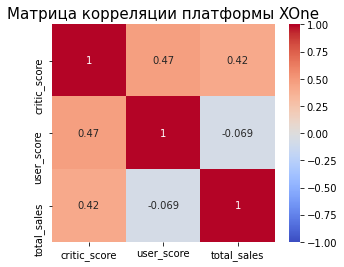

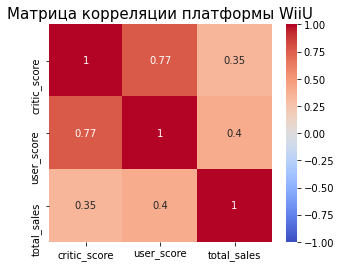

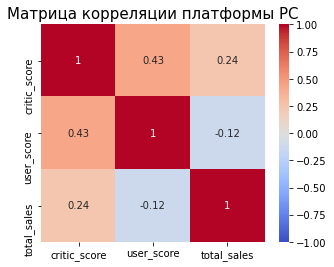

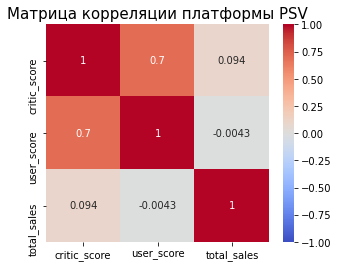

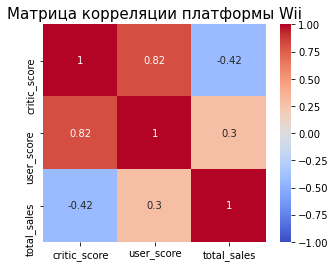

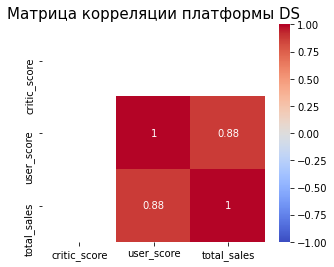

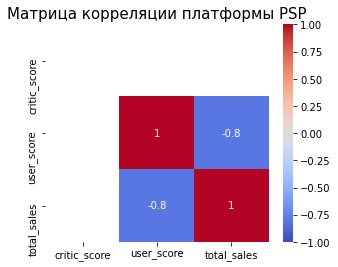

In [41]:
# Составим список ТОП платформ в порядке убывания суммы продаж:
top_platform = ['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

for platform in top_platform:
    # Матрица корреляции
    corr_matrix = df_actual.query('platform == @platform')[['critic_score', 'user_score', 'total_sales']].corr()

    # Визуализация матрицы корреляции
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
    plt.title(f'Матрица корреляции платформы {platform}', size=15)
    plt.show()

**Вывод:**
- На платформах PS3, X360, XOne, а также PS4 оценки пользователей не оказывают влияния на продажи, а оценки критиков имеют лишь незначительное воздействие.
- Для платформ PC и PSV, как оценки пользователей, так и критиков не влияют на продажи.
- На платформах WiiU и Wii наблюдается обратная тенденция: к оценкам пользователей прислушиваются больше.
- На платформах DS и PSP отсутствуют оценки критиков, однако на платформе DS оценки пользователей действительно влияют на продажи.

### Распределение игр по жанрам

Рассмотрим распределение количества релизов игр и суммы их продаж по жанрам в период с 2012 по 2016 годы.

In [42]:
df_actual_genre = df_actual.pivot_table(index='genre', values='name', aggfunc='count')
df_actual_genre.columns = ['Кол-во релизов']
df_actual_genre = df_actual_genre.sort_values(by='Кол-во релизов', ascending=False)
df_actual_genre['total_sales'] = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
df_actual_genre.sort_values(by='total_sales', ascending=False)

,Кол-во релизов,total_sales
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,268,181.07
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


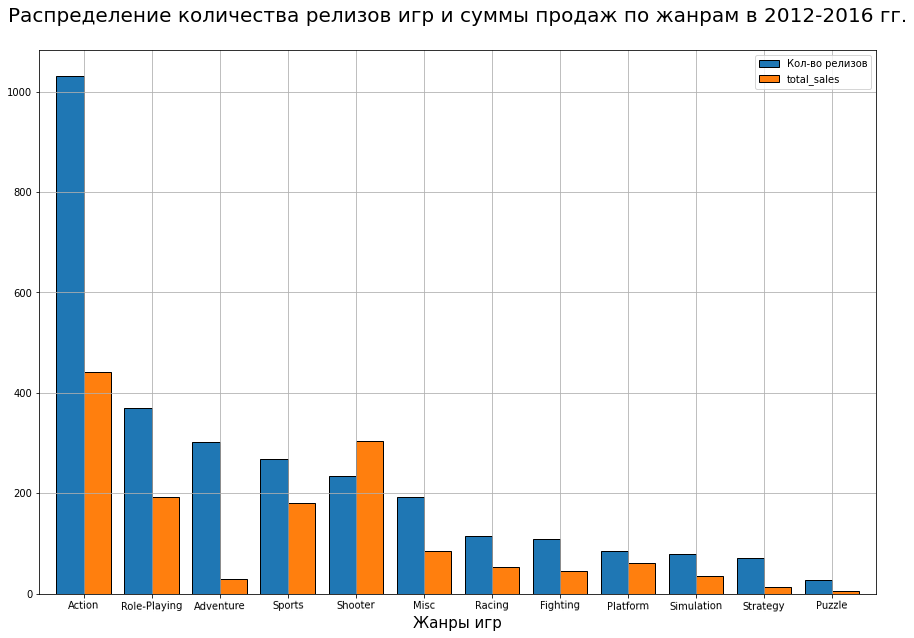

In [43]:
df_actual_genre.plot(grid=True, figsize=(15, 10), kind='bar', width=0.8, ec='black')

plt.title('Распределение количества релизов игр и суммы продаж по жанрам в 2012-2016 гг.'+ "\n", size=20)
plt.xlabel('Жанры игр', size=15)
plt.xticks(rotation=1)
plt.show()

**Вывод:**
- Наиболее востребованные жанры игр по количеству проданных копий: Action, Shooter, Role-Playing, Sports и Misc.
- Особо выделяется жанр Shooter по количеству проданных копий одной игры.
- ТОП жанров игр по количеству релизов включает Action, Role-Playing, Adventure, Sports и Shooter.

### Промежуточный вывод

В ходе исследовательского анализа данных (EDA) можно выделить следующее:
- С 1994 по 2009 год продажи видеоигр значительно выросли. До 1994 года количество игр было незначительным. Наибольшее число игр выпустили с 2002 по 2011 год, что указывает на расцвет индустрии. С 2012 года выпуск игр сократился вдвое из-за перехода на более качественные проекты и роста популярности сетевых и онлайн-игр.
- Жизненный цикл платформ составляет примерно 8-12 лет, при этом пик их популярности длится не более 6 лет. Исходя из этого, для прогнозирования продаж на 2017 год целесообразно обратить внимание на период с 2012 по 2016 год.
- Платформы PS4 и XOne имеют потенциал для дальнейшего роста в 2017 году. В 2012-2016 годах актуальными были PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP. ТОП-5 платформ по популярности за этот период: PS4, PS3, X360, 3DS, XOne.
- График «ящик с усами» за 2012-2016 годы показывает, что на всех платформах много игр с невысокими продажами, но есть и бестселлеры. Особо выделяются PS4, PS3, X360, XOne и Wii благодаря высоким медианным значениям и третьему квартилю, что указывает на множество успешных релизов и значительные продажи.
- На платформах PS3, X360, XOne, а также PS4 оценки пользователей не оказывают влияния на продажи, а оценки критиков имеют лишь незначительное воздействие.
- Самые популярные жанры по проданным копиям: Action, Shooter, Role-Playing, Sports и Misc. Shooter лидирует по количеству проданных копий одной игры. ТОП жанры по количеству релизов: Action, Role-Playing, Adventure, Sports и Shooter.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP, Other) в период с 2012 по 2016 годы:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для построения графиков напишим функцию:

In [44]:
def region(column):
    rows = 1
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(20,8))
    region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']  #список регионов
    count = 0
    for r in range(rows):
        for i in range(cols):
            df_region = df_actual.pivot_table(index=column, values = region_list[count], aggfunc = 'sum')\
            .sort_values(by=region_list[count], ascending = False)[:5]
            title_dict = {'na_sales':'Продажи в Северной Америке',\
                          'eu_sales':'Продажи в Европе',\
                          'jp_sales':'Продажи в Японии',\
                          'other_sales':'Продажи в других регионах' }
            color_dict = {'na_sales':'blue', 'eu_sales':'orange', 'jp_sales':'red', 'other_sales':'gray'}
            plot = df_region.plot(kind='bar', ec='black', ax=axes[i], title=title_dict[region_list[count]],\
                             width=0.7, fontsize=14, color=color_dict[region_list[count]], rot=50)
            plot.set_xlabel('')
            count += 1

### Самые популярные платформы (топ-5)

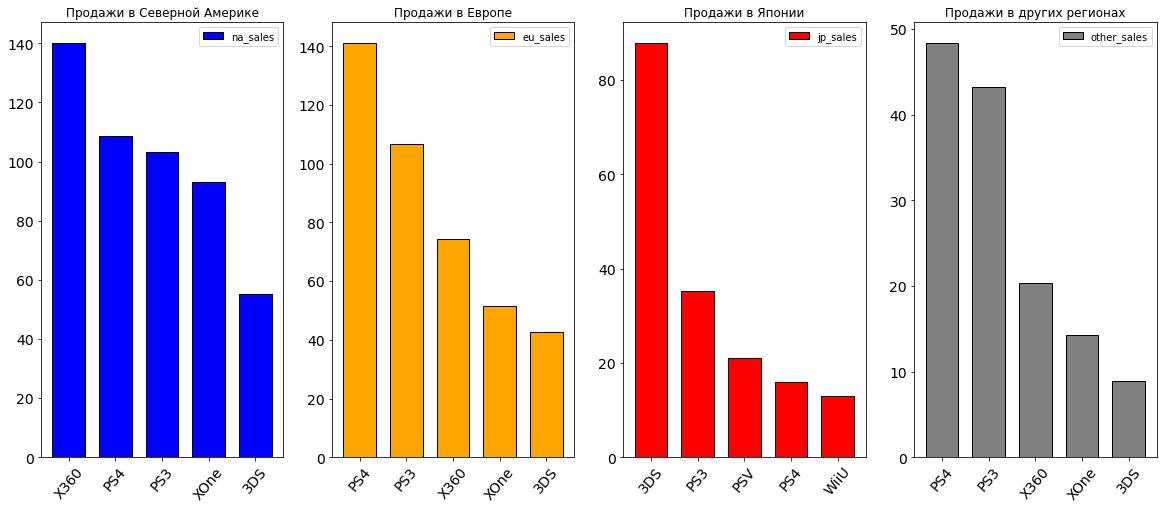

In [45]:
region('platform')

**Вывод:**
- В Северной Америке по продажам игр с большим отрывом лидирует X360, что может быть связано с патриотическими настроениями потребителей. Далее идут PS4, PS3, XOne и 3DS.
- В Европе ситуация несколько иная: на первом месте уверенно держится PS4, за ней следуют PS3, X360, XOne и 3DS.
- В Японии предпочтения смещаются в сторону портативных устройств. Здесь с огромным отрывом лидирует 3DS, затем идут PS3, PSV, PS4 и Wii.
- В других регионах структура продаж похожа на европейскую, однако объёмы реализации в два раза меньше. В этих регионах продажи PS3 сопоставимы с продажами PS4.

### Самые популярные жанры (топ-5)

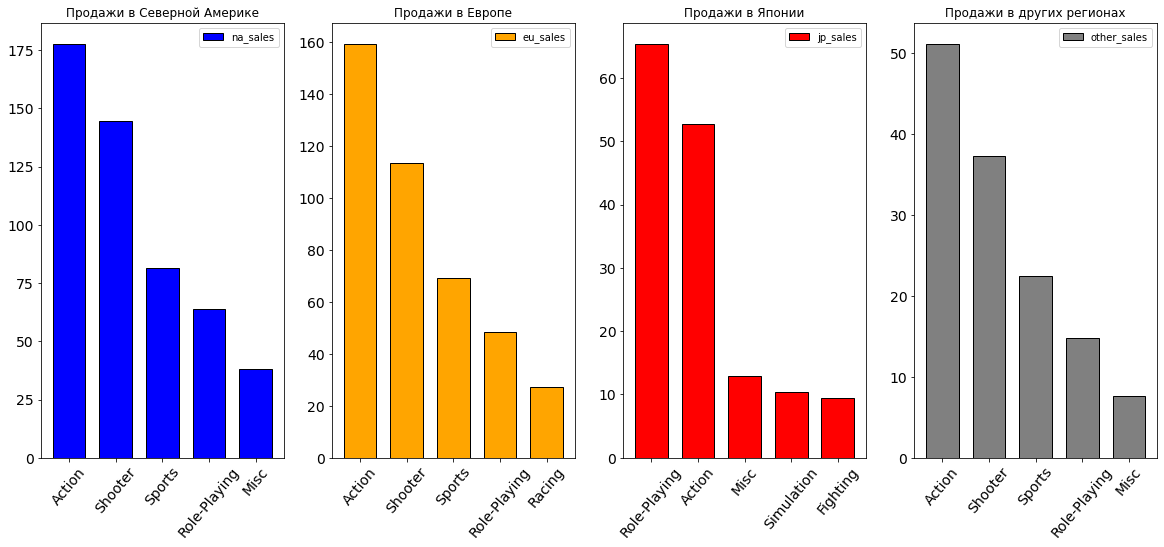

In [46]:
region('genre')

**Вывод:**
- В Северной Америке на первом месте по продажам уверенно лидируют игры жанров Action и Shooter. За ними следуют Sports, Role-Playing и Misc., однако их доля значительно меньше.
- В Европе структура предпочтений немного отличается: на первом месте жанр Action, за ним следуют Shooter, Sports, Role-Playing и Racing.
- В Японии наблюдается совершенно иная картина: с огромным отрывом на вершине находятся Role-Playing и Action игры. Далее, с существенно меньшими продажами, следуют Misc., Simulation и Fighting.
- В других регионах: на первом месте Action и Shooter, затем Sports, Role-Playing и Misc.

### Влияет ли рейтинг ESRB на продажи

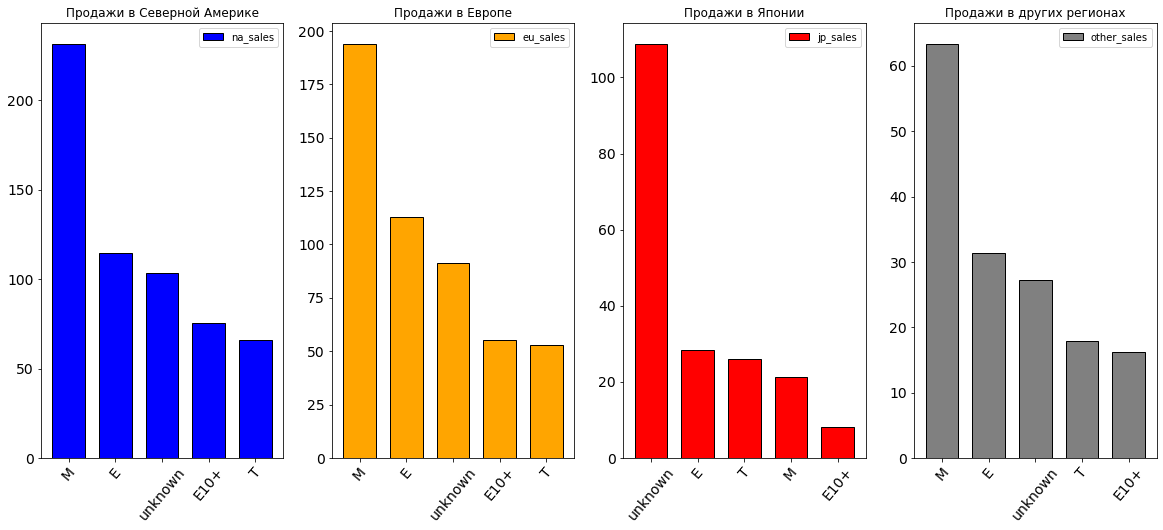

In [47]:
region('rating')

**Вывод:**
- В Северной Америке, Европе и других регионах наблюдается значительная доля продаж игр с рейтингом «M» («Mature») — «Для взрослых». Далее по популярности следуют рейтинги: E, unknown (рейтинг неизвестен), E10+ и T.
- Рынок видеоигр в Японии демонстрирует иную картину: на первом месте находятся игры с рейтингом unknown (рейтинг неизвестен), за ними следуют игры с рейтингами E, T, M и E10+, однако их доля существенно меньше.

### Промежуточный вывод

Платформы:
- В Северной Америке лидирует X360, за ней следуют PS4, PS3, XOne и 3DS.
- В Европе на первом месте PS4, далее идут PS3, X360, XOne и 3DS.
- В Японии предпочтения отдаются портативным устройствам: лидирует 3DS, затем идут PS3, PSV, PS4 и Wii.
- В других регионах структура продаж схожа с европейской, но объёмы в два раза меньше; продажи PS3 и PS4 лидируют и сопоставимы.

Жанры игр:
- В Северной Америке доминируют Action и Shooter, затем идут Sports, Role-Playing и Misc.
- В Европе на первом месте Action, затем Shooter, Sports, Role-Playing и Racing.
- В Японии лидируют с большим отрывом Role-Playing и Action, далее следуют Misc., Simulation и Fighting.
- В других регионах популярны Action и Shooter, затем Sports, Role-Playing и Misc.

Рейтинги игр:
- В Северной Америке, Европе и других регионах лидируют игры с рейтингом «M» («Mature») — «Для взрослых», за ними следуют E, unknown (рейтинг неизвестен), E10+ и T.
- В Японии на первом месте unknown (рейтинг неизвестен), затем E, T, M и E10+.

## Проверка гипотез

На этом этапе мы рассмотрим две гипотезы:

1) Средние пользовательские рейтинги платформ XOne и PC одинаковые.

2) Средние пользовательские рейтинги жанров Action и Sports различаются.

В обеих задачах процесс проверки будет базироваться на следующих предположениях:
- Нулевая гипотеза (H0) утверждает, что средние значения рейтингов для указанных параметров одинаковы.
- Альтернативная гипотеза (H1) предполагает, что средние значения различаются, что указывает на наличие статистически значимой разницы.

Для оценки значимости будет использоваться общепринятое пороговое значение α=0,5. Это значение позволяет определить, достаточно ли оснований для отклонения нулевой гипотезы и принятия альтернативной, что особенно важно при отсутствии необходимости в высокой точности результатов.

### Средние пользовательские рейтинги платформ XOne и PC одинаковые

In [48]:
# сделаем срез и удалим пропуски:
xone = df.query('platform == "XOne"').dropna(subset=['user_score'])
xone['user_score'].describe()

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

In [49]:
# сделаем срез и удалим пропуски:
pc = df.query('platform == "PC"').dropna(subset=['user_score'])
pc['user_score'].describe()

count   755.00
mean      7.07
std       1.53
min       1.40
25%       6.20
50%       7.50
75%       8.20
max       9.30
Name: user_score, dtype: float64

Выборки имеют различные размеры, что требует особого подхода к подтверждению гипотез. В данном случае будет использоваться метод *st.stats.ttest_ind* с заданными параметрами: *equal_var=True* и *alternative='two-sided'*. <br>
Этот метод позволяет учесть различия в размерах выборок и провести двухсторонний тест, который охватывает как случаи, когда средние значения могут быть как больше, так и меньше друг друга, так и случаи их равенства. Такой подход обеспечивает более гибкую и точную проверку статистических гипотез, что особенно важно при анализе данных с различными размерами выборок.

**Н0:** Средние пользовательские рейтинги платформ XOne и PC равны <br>
**Н1:** Средние пользовательские рейтинги платформ XOne и PC не равны

In [50]:
alpha = 0.05
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги платформ XOne и PC статистически не различаются. Это означает, что игроки на обеих платформах ставят играм примерно одинаковые оценки, что указывает на схожесть в их восприятии и удовлетворенности игровым контентом.

### Средние пользовательские рейтинги жанров Action и Sports различаются

In [51]:
# сделаем срез и удалим пропуски:
action = df.query('genre == "Action"').dropna(subset=['user_score'])
action['user_score'].describe()

count   1,796.00
mean        7.06
std         1.42
min         0.30
25%         6.30
50%         7.40
75%         8.10
max         9.50
Name: user_score, dtype: float64

In [52]:
# сделаем срез и удалим пропуски:
sports = df.query('genre == "Sports"').dropna(subset=['user_score'])
sports['user_score'].describe()

count   1,081.00
mean        6.95
std         1.62
min         0.20
25%         6.10
50%         7.40
75%         8.10
max         9.50
Name: user_score, dtype: float64

При проверке данной гипотезы мы заранее предположим противоположное: если мы отвергнем нулевую гипотезу, то сделаем вывод, что категории Action и Sports не равны.

**Н0:** Средние пользовательские рейтинги жанров Action и Sports равны <br>
**Н1:** Средние пользовательские рейтинги жанров Action и Sports не равны

In [53]:
alpha = 0.05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги жанров игр Action и Sports статистически не различаются, что указывает на схожесть в оценках и удовлетворенности игроков этими жанрами.

### Промежуточный вывод

В ходе проверки гипотез мы подтвердили:
- Средние пользовательские рейтинги платформ XOne и PC статистически не различаются, что указывает на схожесть в восприятии и удовлетворенности игровым контентом.
- Средние пользовательские рейтинги жанров игр Action и Sports статистически не различаются, что свидетельствует о равной удовлетворенности игроков этими жанрами.

## Общий вывод

В ходе проекта было проделано следующие:
1) Предобработка данных:
- привели название столбцов к "хорошему стилю" - нижнему регистру;
- в столбцах year_of_release, critic_score, user_score поменяли тип данных;
- обработали пропуски;
- проверили на неявные дубликаты;
- добавили новый столбец total_sales с суммарными продажами по всем регионам.

2)  Исследовательский анализ данных (EDA):
- С 1994 по 2009 год продажи видеоигр значительно выросли. До 1994 года количество игр было незначительным. Наибольшее число игр выпустили с 2002 по 2011 год, что указывает на расцвет индустрии. С 2012 года выпуск игр сократился вдвое из-за перехода на более качественные проекты и роста популярности сетевых и онлайн-игр.
- Жизненный цикл платформ составляет примерно 8-12 лет, при этом пик их популярности длится не более 6 лет. Исходя из этого, для прогнозирования продаж на 2017 год целесообразно обратить внимание на период с 2012 по 2016 год.
- Платформы PS4 и XOne имеют потенциал для дальнейшего роста в 2017 году. В 2012-2016 годах актуальными были PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP. ТОП-5 платформ по популярности за этот период: PS4, PS3, X360, 3DS, XOne.
- График «ящик с усами» за 2012-2016 годы показывает, что на всех платформах много игр с невысокими продажами, но есть и бестселлеры. Особо выделяются PS4, PS3, X360, XOne и Wii благодаря высоким медианным значениям и третьему квартилю, что указывает на множество успешных релизов и значительные продажи.
- На платформах PS3, X360, XOne, а также PS4 оценки пользователей не оказывают влияния на продажи, а оценки критиков имеют лишь незначительное воздействие.
- Самые популярные жанры по проданным копиям: Action, Shooter, Role-Playing, Sports и Misc. Shooter лидирует по количеству проданных копий одной игры. ТОП жанры по количеству релизов: Action, Role-Playing, Adventure, Sports и Shooter.

3) Портрет пользователя каждого региона:

   Платформы:
   - В Северной Америке лидирует X360, за ней следуют PS4, PS3, XOne и 3DS.
   - В Европе на первом месте PS4, далее идут PS3, X360, XOne и 3DS.
   - В Японии предпочтения отдаются портативным устройствам: лидирует 3DS, затем идут PS3, PSV, PS4 и Wii.
   - В других регионах структура продаж схожа с европейской, но объёмы в два раза меньше; продажи PS3 и PS4 лидируют и сопоставимы.
   
   Жанры игр:
   - В Северной Америке доминируют Action и Shooter, затем идут Sports, Role-Playing и Misc.
   - В Европе на первом месте Action, затем Shooter, Sports, Role-Playing и Racing.
   - В Японии лидируют с большим отрывом Role-Playing и Action, далее следуют Misc., Simulation и Fighting.
   - В других регионах популярны Action и Shooter, затем Sports, Role-Playing и Misc.
   
   Рейтинги игр:
   - В Северной Америке, Европе и других регионах лидируют игры с рейтингом «M» («Mature») — «Для взрослых», за ними следуют E, unknown (рейтинг неизвестен), E10+ и T.
   - В Японии на первом месте unknown (рейтинг неизвестен), затем E, T, M и E10+.
   
4) В ходе проверки гипотез мы подтвердили:
- Средние пользовательские рейтинги платформ XOne и PC статистически не различаются, что указывает на схожесть в восприятии и удовлетворенности игровым контентом.
- Средние пользовательские рейтинги жанров игр Action и Sports статистически не различаются, что свидетельствует о равной удовлетворенности игроков этими жанрами.

### Рекомендации

На основе проведенного анализа данных и выявленных тенденций можно сформулировать следующие ключевые рекомендации для увеличения продаж видеоигр в 2017 году:

1) Акцент на платформы PS4 и XOne:<br>
Платформы PS4 и XOne показывают значительный потенциал для роста. Учитывая их популярность и стабильный спрос, рекомендуется сосредоточить усилия на разработке и продвижении игр именно для этих платформ. Это позволит воспользоваться текущим трендом и привлечь максимальное количество пользователей до появления новых технологий.

2) Учет региональных предпочтений:<br>
Важно учитывать региональные предпочтения как по платформам, так и по жанрам и рейтингу видеоигр. Адаптация контента под региональные предпочтения поможет лучше соответствовать ожиданиям целевой аудитории и увеличить продажи.

3) Постоянный мониторинг рынка:<br>
Необходимо постоянно отслеживать рыночные тенденции и учитывать оценки критиков. Хотя оценки критиков и пользователей не всегда напрямую влияют на продажи на платформах PS3, X360, XOne, PS4, поддержание высокого качества игр и положительные отзывы могут улучшить восприятие бренда. Постоянный анализ рыночных данных и адаптация стратегий в зависимости от полученных результатов помогут оставаться конкурентоспособными и эффективно реагировать на изменения в индустрии.